<a href="https://colab.research.google.com/github/AbhishekAdarshMishra/Python-Deep-Learning-Neural-Network-with-Keras-and-Tensorflow.js/blob/main/Python_Deep_Learning_with_Keras_and_Tensorflow_js.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preparation And Preprocessing**

In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

train_labels = []
train_samples = []

* An experimental drug was tested on individuals ranging from age 13 to 100 in a clinical trial. 
* The trial had 2100 participants. Half of the participants were under 65 years old, and the other half were 65 years of age or older.
* Around 95% of patients 65 or older experienced side effects from the drug.
* Around 95% of patients under 65 experienced no side effects.



In [ ]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    #1 represent experice side effect

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    # 0 represent does not experience side effect

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [ ]:
for i in train_samples:
  print(i)

In [ ]:
for i in train_labels:
  print(i)

We now convert both lists into NumPy arrays due to what we discussed the fit() function expects, and we then shuffle the arrays to remove any order that was imposed on the data during the creation process.

In [ ]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

MinMaxScaler class to scale all of the data down from a scale ranging from 13 to 100 to be on a scale from 0 to 1.

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [ ]:
for i in scaled_train_samples:
    print(i)

# ***Create An Artificial Neural Network With TensorFlow's Keras API***

simple artificial neural network using a Sequential model from the Keras API integrated within TensorFlow.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
#(if available gpu uncomment) tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  0


In [ ]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


#**Training of an Artificial Neural Network**

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, verbose=2)

# **Validation set**

Instead of above fit function use below code

In [ ]:
model.fit(
      x=scaled_train_samples
    , y=train_labels
    , validation_split=0.1
    , batch_size=10
    , epochs=30
    , verbose=2
)

# **Test Set**

In [ ]:
test_labels =  []
test_samples = []
for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

**Prediction**

In [ ]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0 #zero as we dont want output to print instead we want to store it.
)

In [ ]:
for i in predictions:
    print(i)

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)

for i in rounded_predictions:
    print(i)

# **Confusion Matrix**

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [ ]:
 def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[198  12]
 [ 10 200]]


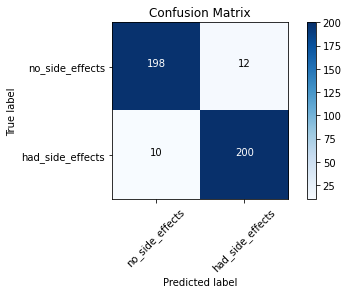

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# **Save and Load A model**

**1. model.save()**

In [ ]:
# Check first to see if file exists already.
# If not , the model is saved to disk.

import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
  model.save('models/medical_trial_model.h5')

This save functions saves:
* The architecture of the model, allowing to re-create the model.
* the weights of the models.
* The training configuration (loss, optimizer).
* The state of the optimizer, allowing to resume training exactly where you left off.

**2. load_model**

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [ ]:
new_model.summary()

In [ ]:
new_model.get_weights()

In [ ]:
new_model.optimizer

**3. model.to_json()**

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In [ ]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [ ]:
# model reconstruction from JSON
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction form YAML
# from tensorflow.keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [ ]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


**4. model.save_weights()**

If you only need to save the weights of a model, you can use the following function save the weights only.

In [ ]:
# Check first to see if file exists already.
# If not , the model is saved to disk.

import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
  model.save('models/medical_trial_model.h5')

In [ ]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [ ]:
model2.load_weights('models/my_model_weights.h5')

In [ ]:
model2.get_weights()

# **Image Preparation For A Convolutional Neural Network**

**Kagle dataset import**

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [14]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/My Drive/kaggle_dataset'

In [16]:
%cd /content/gdrive/My Drive/kaggle_dataset

/content/gdrive/My Drive/kaggle_dataset


In [5]:
!ls

kaggle.json  sampleSubmission.csv  test  test1.zip  train  train.zip  valid


In [10]:
!kaggle competitions download -c dogs-vs-cats

sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
  1% 8.00M/543M [00:01<01:18, 7.19MB/s]
User cancelled operation


In [ ]:
!mkdir train
!mv train.zip train

In [ ]:
%cd train

In [ ]:
!unzip train.zip

**Organize The Data**

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [9]:
!ls

kaggle.json  sampleSubmission.csv  test  test1.zip  train  train.zip  valid


In [ ]:
%cd train/cat

In [14]:
%cd ..

/content/gdrive/My Drive/kaggle_dataset/train


In [15]:
!ls

cat  dog  train  train.zip


In [16]:
# Organize data into train, valid, test dirs
os.chdir('/content/gdrive/MyDrive/kaggle_dataset')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')


In [ ]:
    os.chdir('/content/gdrive/MyDrive/kaggle_dataset/train/train/')
    for i in random.sample(glob.glob('cat*'), 500):
        shutil.move(i, '/content/gdrive/MyDrive/kaggle_dataset/train/cat')      
    for i in random.sample(glob.glob('dog*'), 500):
        shutil.move(i, '/content/gdrive/MyDrive/kaggle_dataset/train/dog')
    for i in random.sample(glob.glob('cat*'), 100):
        shutil.move(i, '/content/gdrive/MyDrive/kaggle_dataset/valid/cat')        
    for i in random.sample(glob.glob('dog*'), 100):
        shutil.move(i, '/content/gdrive/MyDrive/kaggle_dataset/valid/dog')
    for i in random.sample(glob.glob('cat*'), 50):
        shutil.move(i, '/content/gdrive/MyDrive/kaggle_dataset/test/cat')      
    for i in random.sample(glob.glob('dog*'), 50):
        shutil.move(i, '/content/gdrive/MyDrive/kaggle_dataset/test/dog')

    
  

**Process The Data**

In [19]:
train_path = '/content/gdrive/MyDrive/kaggle_dataset/train'
valid_path = '/content/gdrive/MyDrive/kaggle_dataset/valid'
test_path = '/content/gdrive/MyDrive/kaggle_dataset/test'

In [20]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


* Image data generator is use to generate image in format of vgg16 . we will disscuss it later
* Target size(224,224) is used to set the size of all images

**Visualize The Data**

In [23]:
assert train_batches.n == 2000
assert valid_batches.n == 400
assert test_batches.n == 200
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [24]:
imgs, labels = next(train_batches)

This below function will plot images in the form of a grid with 1 row and 10 columns where images are placed

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

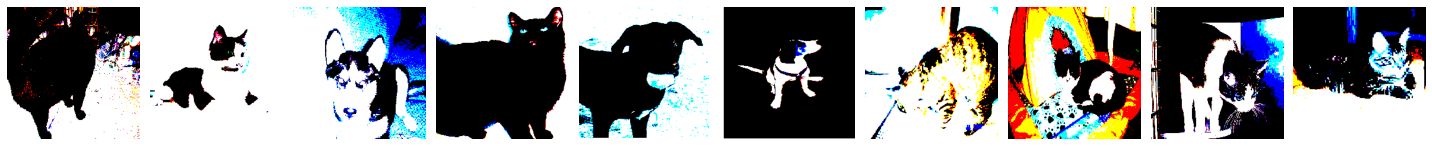

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [25]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(imgs)
print(labels)

so in output [0,1] represent dog and [1,0] represent cat.

# **Build And Train A CNN**

**Build**

In [22]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [24]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [25]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
200/200 - 469s - loss: 11.8453 - accuracy: 0.5740 - val_loss: 8.3984 - val_accuracy: 0.5400
Epoch 2/10
200/200 - 10s - loss: 1.4057 - accuracy: 0.7960 - val_loss: 1.9449 - val_accuracy: 0.6250
Epoch 3/10
200/200 - 10s - loss: 0.3045 - accuracy: 0.9215 - val_loss: 1.9665 - val_accuracy: 0.6175
Epoch 4/10
200/200 - 10s - loss: 0.0656 - accuracy: 0.9795 - val_loss: 1.7960 - val_accuracy: 0.6400
Epoch 5/10
200/200 - 10s - loss: 0.0201 - accuracy: 0.9960 - val_loss: 1.7885 - val_accuracy: 0.6525
Epoch 6/10
200/200 - 10s - loss: 0.0101 - accuracy: 0.9980 - val_loss: 1.8366 - val_accuracy: 0.6650
Epoch 7/10
200/200 - 10s - loss: 0.0061 - accuracy: 0.9990 - val_loss: 1.7534 - val_accuracy: 0.6475
Epoch 8/10
200/200 - 10s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.7344 - val_accuracy: 0.6350
Epoch 9/10
200/200 - 10s - loss: 9.1679e-04 - accuracy: 1.0000 - val_loss: 1.7421 - val_accuracy: 0.6300
Epoch 10/10
200/200 - 10s - loss: 7.2445e-04 - accuracy: 1.0000 - val_loss: 1.7545 - 

# CNN prediction

**Preparing The Test Data**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

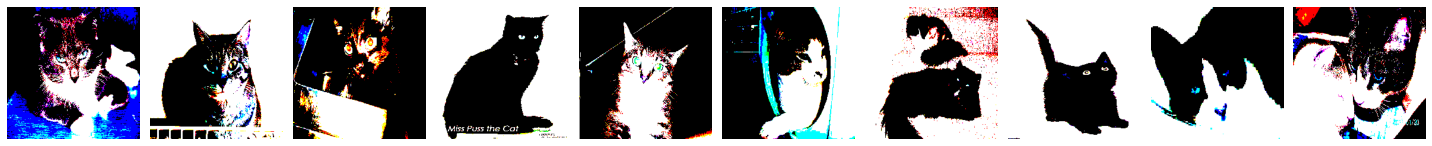

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [26]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

**Predicting On The Test Data**

In [27]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
np.round(predictions)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [28]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [30]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[34 66]
 [10 90]]


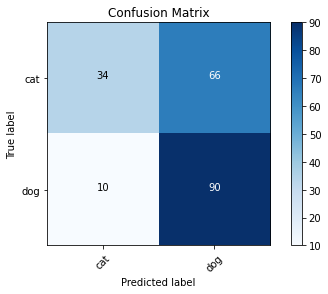

In [31]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [22]:
!nvidia-smi

Tue Mar 30 21:30:48 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    32W /  70W |   2398MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Build a fine tuned Neural Network**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

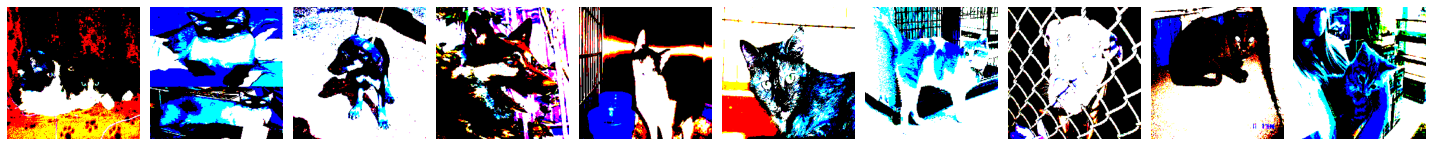

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [32]:
imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

**VGG16 Preprocessing**

In [4]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 5s 0us/step


In [33]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [34]:
type(vgg16_model)


tensorflow.python.keras.engine.functional.Functional

In [35]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)


In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [37]:
for layer in model.layers:
    layer.trainable = False

In [38]:
model.add(Dense(units=2, activation='softmax'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

# **Train A Fine-Tuned Neural Network**

**VGG16**

In [40]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Epoch 1/5
200/200 - 617s - loss: 0.2202 - accuracy: 0.9160 - val_loss: 0.0865 - val_accuracy: 0.9575
Epoch 2/5
200/200 - 15s - loss: 0.0737 - accuracy: 0.9735 - val_loss: 0.0661 - val_accuracy: 0.9725
Epoch 3/5
200/200 - 15s - loss: 0.0525 - accuracy: 0.9825 - val_loss: 0.0564 - val_accuracy: 0.9725
Epoch 4/5
200/200 - 14s - loss: 0.0420 - accuracy: 0.9855 - val_loss: 0.0528 - val_accuracy: 0.9750
Epoch 5/5
200/200 - 14s - loss: 0.0329 - accuracy: 0.9910 - val_loss: 0.0514 - val_accuracy: 0.9775


# **Predict With A Fine-Tuned Neural Network**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

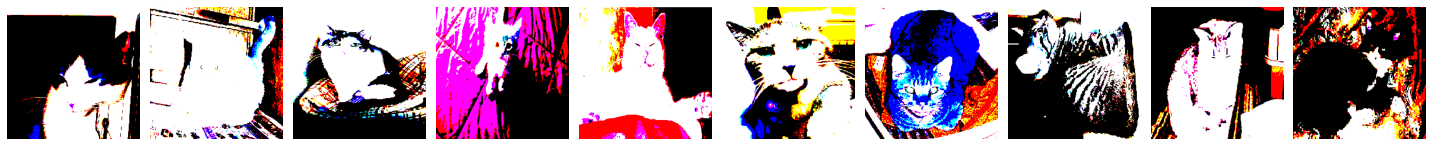

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [43]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [44]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)


**confusion matrix and plot**

Confusion matrix, without normalization
[[ 97   3]
 [  0 100]]


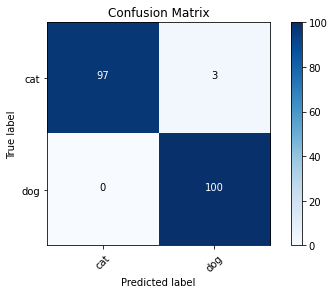

In [45]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# **MobileNet Image Classification With TensorFlow's Keras API**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)


Num GPUs Available:  1


In [3]:
!nvidia-smi

Tue Mar 30 23:42:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    10W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [76]:
def prepare_image(file):
    img_path = '/content/gdrive/MyDrive/MobileNetSample/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

**Predicting With MobileNet**

**MobileNet Lizard Prediction**

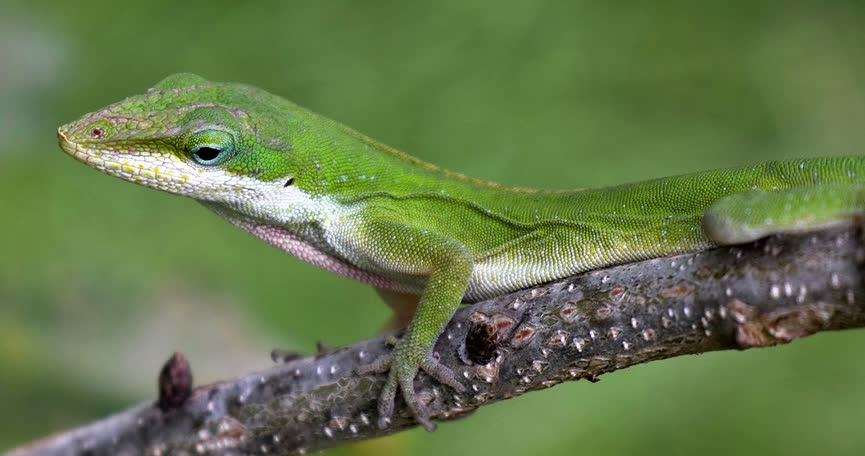

In [54]:
from IPython.display import Image
Image(filename='/content/gdrive/MyDrive/MobileNetSample/1.jpg', width=300,height=200) 

In [78]:
preprocessed_image = prepare_image('1.jpg')
predictions = mobile.predict(preprocessed_image)

In [79]:
results = imagenet_utils.decode_predictions(predictions)

In [80]:
results

[[('n01682714', 'American_chameleon', 0.652747),
  ('n01693334', 'green_lizard', 0.18943377),
  ('n01687978', 'agama', 0.13799524),
  ('n01689811', 'alligator_lizard', 0.013600769),
  ('n01688243', 'frilled_lizard', 0.004315295)]]

**MobileNet Espresso Prediction**

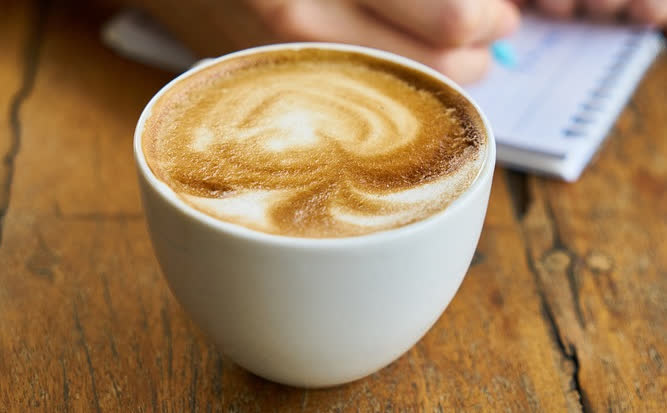

In [82]:
from IPython.display import Image
Image(filename='/content/gdrive/MyDrive/MobileNetSample/2.jpg', width=300,height=200) 

In [84]:
preprocessed_image = prepare_image('2.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n07920052', 'espresso', 0.97666264),
  ('n07930864', 'cup', 0.010093454),
  ('n07932039', 'eggnog', 0.008596991),
  ('n03063599', 'coffee_mug', 0.003665154),
  ('n04597913', 'wooden_spoon', 0.00049636164)]]

**MobileNet Strawberry Prediction**

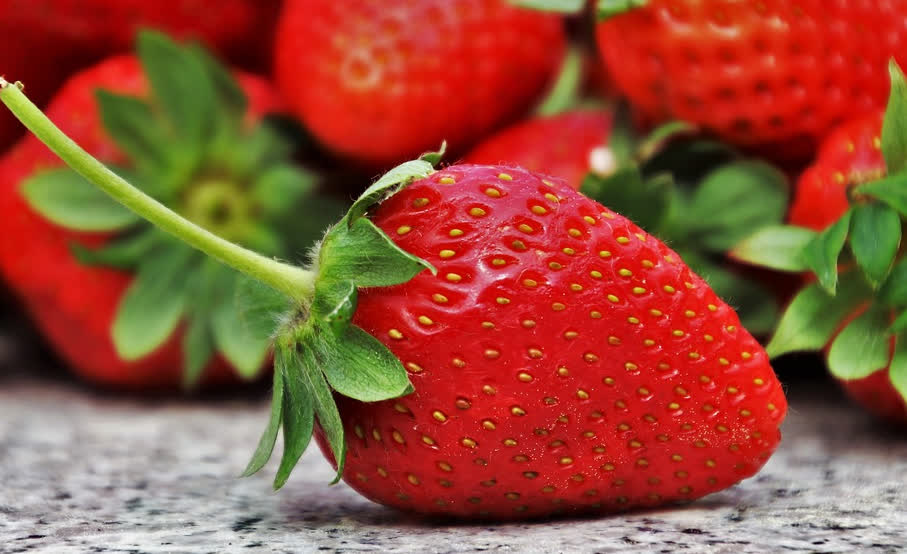

In [86]:
from IPython.display import Image
Image(filename='/content/gdrive/MyDrive/MobileNetSample/3.jpg', width=300,height=200) 

In [88]:
preprocessed_image = prepare_image('3.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n07745940', 'strawberry', 0.99999344),
  ('n07749582', 'lemon', 1.2442115e-06),
  ('n07747607', 'orange', 8.6023397e-07),
  ('n07753275', 'pineapple', 8.278187e-07),
  ('n07768694', 'pomegranate', 6.2610513e-07)]]

# **Process Images For Fine-Tuned MobileNet**

In [5]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/My Drive/kaggle_dataset'

In [12]:
!unzip Sign-Language.zip

Archive:  Sign-Language.zip
a8e74fdf07410782d1bb8c12caa259a5f7154864
   creating: Sign-Language-Digits-Dataset-master/
   creating: Sign-Language-Digits-Dataset-master/Dataset/
   creating: Sign-Language-Digits-Dataset-master/Dataset/0/
  inflating: Sign-Language-Digits-Dataset-master/Dataset/0/IMG_1118.JPG  
  inflating: Sign-Language-Digits-Dataset-master/Dataset/0/IMG_1128.JPG  
  inflating: Sign-Language-Digits-Dataset-master/Dataset/0/IMG_1138.JPG  
  inflating: Sign-Language-Digits-Dataset-master/Dataset/0/IMG_1148.JPG  
  inflating: Sign-Language-Digits-Dataset-master/Dataset/0/IMG_1158.JPG  
  inflating: Sign-Language-Digits-Dataset-master/Dataset/0/IMG_1169.JPG  
  inflating: Sign-Language-Digits-Dataset-master/Dataset/0/IMG_1179.JPG  
  inflating: Sign-Language-Digits-Dataset-master/Dataset/0/IMG_1189.JPG  
  inflating: Sign-Language-Digits-Dataset-master/Dataset/0/IMG_1199.JPG  
  inflating: Sign-Language-Digits-Dataset-master/Dataset/0/IMG_1209.JPG  
  inflating: Sign-Langu

**Organise Data**

In [16]:
# Organize data into train, valid, test dirs
os.chdir('/content/gdrive/MyDrive/kaggle_dataset/sign/Dataset')
if os.path.isdir('train/0/') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

**Process The Data**

In [17]:
train_path = '/content/gdrive/MyDrive/kaggle_dataset/sign/Dataset/train'
valid_path = '/content/gdrive/MyDrive/kaggle_dataset/sign/Dataset/valid'
test_path = '/content/gdrive/MyDrive/kaggle_dataset/sign/Dataset/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


# **Fine-Tuning MobileNet On A Custom Data Set**

**Modify Model**

In [18]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

Next, we're going to grab the output from the sixth to last layer of the model and store it in this variable x.
which will just be a Dense layer with 10 output nodes for the ten corresponding classes

In [19]:
x = mobile.layers[-6].output
output = Dense(units=10, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=output)

I did a little experimenting and found that training the last 23 layers will give us a pretty decently performing model.

In [20]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

**Train The Model**

In [22]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=30,
            verbose=2
)


Epoch 1/30
172/172 - 42s - loss: 0.6208 - accuracy: 0.8189 - val_loss: 0.3017 - val_accuracy: 0.9333
Epoch 2/30
172/172 - 7s - loss: 0.1091 - accuracy: 0.9831 - val_loss: 0.1653 - val_accuracy: 0.9633
Epoch 3/30
172/172 - 7s - loss: 0.0479 - accuracy: 0.9971 - val_loss: 0.1262 - val_accuracy: 0.9833
Epoch 4/30
172/172 - 7s - loss: 0.0366 - accuracy: 0.9959 - val_loss: 0.1318 - val_accuracy: 0.9733
Epoch 5/30
172/172 - 7s - loss: 0.0241 - accuracy: 0.9977 - val_loss: 0.1266 - val_accuracy: 0.9800
Epoch 6/30
172/172 - 7s - loss: 0.0156 - accuracy: 0.9977 - val_loss: 0.1271 - val_accuracy: 0.9833
Epoch 7/30
172/172 - 7s - loss: 0.0140 - accuracy: 0.9982 - val_loss: 0.1065 - val_accuracy: 0.9933
Epoch 8/30
172/172 - 7s - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.1139 - val_accuracy: 0.9900
Epoch 9/30
172/172 - 7s - loss: 0.0082 - accuracy: 0.9994 - val_loss: 0.1266 - val_accuracy: 0.9833
Epoch 10/30
172/172 - 7s - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.1144 - val_accuracy: 0.986

**predictions**

In [24]:
test_labels = test_batches.classes

In [25]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)


In [26]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


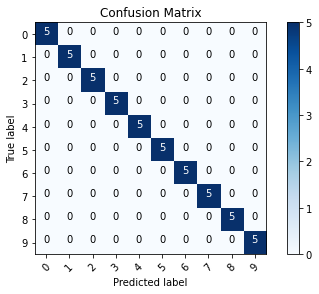

In [28]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# **Data Augmentation**

reason to use data augmentation is to reduce overfitting or our training data is too less

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [41]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [42]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

In [45]:
chosen_image = random.choice(os.listdir('/content/gdrive/MyDrive/kaggle_dataset/train/dog'))
image_path = '/content/gdrive/MyDrive/kaggle_dataset/train/dog/' + chosen_image


In [46]:
#obtain image
image = np.expand_dims(plt.imread(image_path),0)

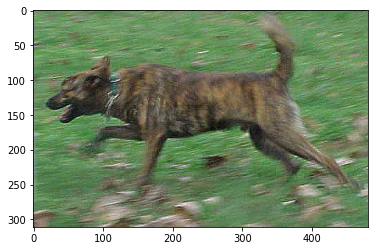

In [47]:
plt.imshow(image[0])

we'll generate batches of augmented images from the original image

In [48]:
aug_iter = gen.flow(image)

we'll get ten samples of the augmented images.

In [49]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

we'll plot the augmented images.

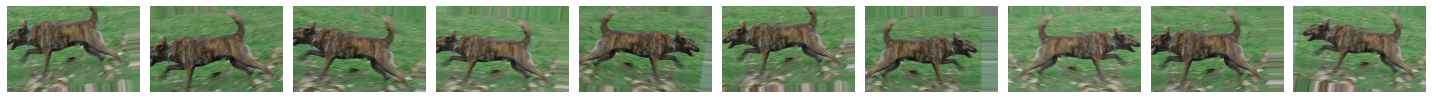

In [50]:
plotImages(aug_images)

**Save Augmented Data**

In [52]:
aug_iter = gen.flow(image, save_to_dir='/content/gdrive/MyDrive/kaggle_dataset/train/dog', save_prefix='aug-image-', save_format='jpeg')